In [14]:
import cv2
import numpy as np
import os

colors = {
    'red': (0, 0, 255),
    'green': (0, 255, 0),
    'blue': (255, 0, 0),
    'yellow': (0, 255, 255),
    'black': (0, 0, 0),
    'purple': (240, 32, 160),
}

data_root = 'data/toy_dataset_366_500'
num_image = 500

os.makedirs(data_root, exist_ok=True)

# Generate Circle(small, medium, big)

In [15]:
obj = 'Circle'

# for k, v in colors.items():
#     os.makedirs(os.path.join(data_root, f'{k} {obj}'), exist_ok=True)
#     for i in range(num_image):
#         image = np.full((64, 64, 3), 255, dtype=np.uint8)
#         r = np.random.randint(2, 20)
#         x, y = np.random.randint(24, 42, size=(2,))
#         cv2.circle(image, (x, y), r, v, thickness=-1)
#         cv2.imwrite(os.path.join(data_root, f'{k} {obj}', "{:05d}.jpg".format(i)), image)

size = "small"

for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        r = np.random.randint(2, 6)
        x, y = np.random.randint(26, 42, size=(2,))
        cv2.circle(image, (x, y), r, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "medium"

for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        r = np.random.randint(10, 16)
        x, y = np.random.randint(26, 42, size=(2,))
        cv2.circle(image, (x, y), r, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)


size = "big"
        
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        r = np.random.randint(20, 26)
        x, y = np.random.randint(26, 42, size=(2,))
        cv2.circle(image, (x, y), r, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

# Generate Recangle(small, medium, big)

In [16]:
obj = 'Rectangle'

# for k, v in colors.items():
#     for i in range(num_image):
#         os.makedirs(os.path.join(data_root, f'{k} {obj}'), exist_ok=True)
#         image = np.full((64, 64, 3), 255, dtype=np.uint8)
#         x, y = np.random.randint(2, 34, size=(2,))
#         w, h = np.random.randint(2, 28), np.random.randint(2, 30)
#         cv2.rectangle(image, (x, y), (x + w, y + h), v, thickness=-1)
#         cv2.imwrite(os.path.join(data_root, f'{k} {obj}', "{:05d}.jpg".format(i)), image)
        
        
size = "small"
for k, v in colors.items():
    for i in range(num_image):
        os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        x, y = np.random.randint(2, 44, size=(2,))
        w, h = np.random.randint(2, 10), np.random.randint(2, 10)
        cv2.rectangle(image, (x, y), (x + w, y + h), v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

size = "medium"
for k, v in colors.items():
    for i in range(num_image):
        os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        x, y = np.random.randint(2, 34, size=(2,))
        w, h = np.random.randint(15, 25), np.random.randint(15, 25)
        cv2.rectangle(image, (x, y), (x + w, y + h), v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

size = "big"
for k, v in colors.items():
    for i in range(num_image):
        os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        x, y = np.random.randint(2, 20, size=(2,))
        w, h = np.random.randint(30, 40), np.random.randint(30, 40)
        cv2.rectangle(image, (x, y), (x + w, y + h), v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

# Generate Triangle

In [17]:
obj = 'Triangle'


# for k, v in colors.items():
#     for i in range(num_image):
#         os.makedirs(os.path.join(data_root, f'{k} {obj}'), exist_ok=True)
#         image = np.full((64, 64, 3), 255, dtype=np.uint8)
#         x1, y1 = np.random.randint(5, 60), np.random.randint(2, 28)
#         x2, y2 = np.random.randint(2, 30), np.random.randint(34, 60)
#         x3, y3 = np.random.randint(34, 60, size=(2,))
#         points = np.array([(x1, y1), (x2, y2), (x3, y3)])
#         cv2.drawContours(image, [points], 0, v, thickness=-1)
#         cv2.imwrite(os.path.join(data_root, f'{k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "small"

for k, v in colors.items():
    for i in range(num_image):
        os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        x1, y1 = np.random.randint(25, 40), np.random.randint(20, 28)
        x2, y2 = np.random.randint(25, 32), np.random.randint(30, 40)
        x3, y3 = np.random.randint(32, 40), np.random.randint(30, 40)
        points = np.array([(x1, y1), (x2, y2), (x3, y3)])
        cv2.drawContours(image, [points], 0, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "medium"

for k, v in colors.items():
    for i in range(num_image):
        os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        x1, y1 = np.random.randint(15, 50), np.random.randint(15, 22)
        x2, y2 = np.random.randint(15, 33), np.random.randint(45, 53)
        x3, y3 = np.random.randint(33, 50), np.random.randint(45, 55)
        points = np.array([(x1, y1), (x2, y2), (x3, y3)])
        cv2.drawContours(image, [points], 0, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "big"

for k, v in colors.items():
    for i in range(num_image):
        os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        x1, y1 = np.random.randint(0, 64), np.random.randint(0, 10)
        x2, y2 = np.random.randint(0, 32), np.random.randint(58, 64)
        x3, y3 = np.random.randint(32, 64), np.random.randint(58, 64)
        points = np.array([(x1, y1), (x2, y2), (x3, y3)])
        cv2.drawContours(image, [points], 0, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

# Generate Pentagon

In [18]:
obj = 'Pentagon'

# for k, v in colors.items():
#     os.makedirs(os.path.join(data_root, f'{k} {obj}'), exist_ok=True)
#     for i in range(num_image):
#         image = np.full((64, 64, 3), 255, dtype=np.uint8)
#         cx, cy = np.random.randint(25, 40, size=(2, ))
#         w, h = np.random.randint(20, 40, size=(2, ))
#         sw = int(w * (0.6 * np.random.rand(1) + 0.2))
#         p1 = (cx, cy - h // 2)
#         p2 = (cx - w // 2, cy)
#         p3 = (cx - sw // 2, cy + h // 2)
#         p4 = (cx + sw // 2, cy + h // 2)
#         p5 = (cx + w // 2, cy)
#         points = np.array([p1, p2, p3, p4, p5])
#         cv2.drawContours(image, [points], 0, v, thickness=-1)
#         cv2.imwrite(os.path.join(data_root, f'{k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "small"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        cx, cy = np.random.randint(25, 40, size=(2, ))
        w, h = np.random.randint(10, 20, size=(2, ))
        sw = int(w * (0.6 * np.random.rand(1) + 0.2))
        p1 = (cx, cy - h // 2)
        p2 = (cx - w // 2, cy)
        p3 = (cx - sw // 2, cy + h // 2)
        p4 = (cx + sw // 2, cy + h // 2)
        p5 = (cx + w // 2, cy)
        points = np.array([p1, p2, p3, p4, p5])
        cv2.drawContours(image, [points], 0, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "medium"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        cx, cy = np.random.randint(25, 40, size=(2, ))
        w, h = np.random.randint(25, 35, size=(2, ))
        sw = int(w * (0.5 * np.random.rand(1) + 0.3))
        p1 = (cx, cy - h // 2)
        p2 = (cx - w // 2, cy)
        p3 = (cx - sw // 2, cy + h // 2)
        p4 = (cx + sw // 2, cy + h // 2)
        p5 = (cx + w // 2, cy)
        points = np.array([p1, p2, p3, p4, p5])
        cv2.drawContours(image, [points], 0, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "big"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        cx, cy = np.random.randint(25, 40, size=(2, ))
        w, h = np.random.randint(40, 50, size=(2, ))
        sw = int(w * (0.5 * np.random.rand(1) + 0.4))
        p1 = (cx, cy - h // 2)
        p2 = (cx - w // 2, cy)
        p3 = (cx - sw // 2, cy + h // 2)
        p4 = (cx + sw // 2, cy + h // 2)
        p5 = (cx + w // 2, cy)
        points = np.array([p1, p2, p3, p4, p5])
        cv2.drawContours(image, [points], 0, v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

# Generate Oval

In [19]:
obj = 'Oval'

# size = "small"
# for k, v in colors.items():
#     os.makedirs(os.path.join(data_root, f'{k} {obj}'), exist_ok=True)
#     for i in range(num_image):
#         image = np.full((64, 64, 3), 255, dtype=np.uint8)
#         rotate = np.random.randint(0, 180)
#         short, long = np.random.randint(2, 10), np.random.randint(11, 20)
#         center = np.random.randint(20, 40, size=(2,))
#         cv2.ellipse(image, center, (short, long), rotate, 0, 360, color=v, thickness=-1)
#         cv2.imwrite(os.path.join(data_root, f'{k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "small"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        rotate = np.random.randint(0, 180)
        short, long = np.random.randint(2, 8), np.random.randint(10, 16)
        center = np.random.randint(20, 40, size=(2,))
        cv2.ellipse(image, center, (short, long), rotate, 0, 360, color=v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "medium"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        rotate = np.random.randint(0, 180)
        short, long = np.random.randint(12, 18), np.random.randint(20, 26)
        center = np.random.randint(20, 40, size=(2,))
        cv2.ellipse(image, center, (short, long), rotate, 0, 360, color=v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

size = "big"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        rotate = np.random.randint(0, 180)
        short, long = np.random.randint(22, 26), np.random.randint(30, 36)
        center = np.random.randint(25, 35, size=(2,))
        cv2.ellipse(image, center, (short, long), rotate, 0, 360, color=v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

# Generate Hexagan

In [20]:
obj = 'Hexagon'

# for k, v in colors.items():
#     os.makedirs(os.path.join(data_root, f'{k} {obj}'), exist_ok=True)
#     for i in range(num_image):
#         image = np.full((64, 64, 3), 255, dtype=np.uint8)
#         cx, cy = np.random.randint(20, 44, size=(2,))
#         w, h = np.random.randint(20, 40, size=(2, ))
#         sw = int(w * (0.6 * np.random.rand(1) + 0.2))
#         p1 = (cx - sw // 2, cy - h // 2)
#         p2 = (cx - w // 2, cy)
#         p3 = (cx - sw // 2, cy + h // 2)
#         p4 = (cx + sw // 2, cy + h // 2)
#         p5 = (cx + w // 2, cy)
#         p6 = (cx + sw // 2, cy - h // 2)
#         points = np.array([p1, p2, p3, p4, p5, p6])
#         cv2.drawContours(image, [points], 0, color=v, thickness=-1)
#         cv2.imwrite(os.path.join(data_root, f'{k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "small"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        cx, cy = np.random.randint(20, 44, size=(2,))
        w, h = np.random.randint(10, 20, size=(2, ))
        sw = int(w * (0.6 * np.random.rand(1) + 0.2))
        p1 = (cx - sw // 2, cy - h // 2)
        p2 = (cx - w // 2, cy)
        p3 = (cx - sw // 2, cy + h // 2)
        p4 = (cx + sw // 2, cy + h // 2)
        p5 = (cx + w // 2, cy)
        p6 = (cx + sw // 2, cy - h // 2)
        points = np.array([p1, p2, p3, p4, p5, p6])
        cv2.drawContours(image, [points], 0, color=v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "medium"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        cx, cy = np.random.randint(20, 44, size=(2,))
        w, h = np.random.randint(25, 35, size=(2, ))
        sw = int(w * (0.5 * np.random.rand(1) + 0.3))
        p1 = (cx - sw // 2, cy - h // 2)
        p2 = (cx - w // 2, cy)
        p3 = (cx - sw // 2, cy + h // 2)
        p4 = (cx + sw // 2, cy + h // 2)
        p5 = (cx + w // 2, cy)
        p6 = (cx + sw // 2, cy - h // 2)
        points = np.array([p1, p2, p3, p4, p5, p6])
        cv2.drawContours(image, [points], 0, color=v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)
        
size = "big"
for k, v in colors.items():
    os.makedirs(os.path.join(data_root, f'{size} {k} {obj}'), exist_ok=True)
    for i in range(num_image):
        image = np.full((64, 64, 3), 255, dtype=np.uint8)
        cx, cy = np.random.randint(25, 35, size=(2,))
        w, h = np.random.randint(40, 50, size=(2, ))
        sw = int(w * (0.5 * np.random.rand(1) + 0.4))
        p1 = (cx - sw // 2, cy - h // 2)
        p2 = (cx - w // 2, cy)
        p3 = (cx - sw // 2, cy + h // 2)
        p4 = (cx + sw // 2, cy + h // 2)
        p5 = (cx + w // 2, cy)
        p6 = (cx + sw // 2, cy - h // 2)
        points = np.array([p1, p2, p3, p4, p5, p6])
        cv2.drawContours(image, [points], 0, color=v, thickness=-1)
        cv2.imwrite(os.path.join(data_root, f'{size} {k} {obj}', "{:05d}.jpg".format(i)), image)

# dataset with one condition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
points = []
for tar in os.listdir("data/2DPoints"):
    p = np.load(os.path.join("data", "2DPoints", tar, "points.npy"))
    points.append(p)
    
points = np.concatenate(points, axis=0)

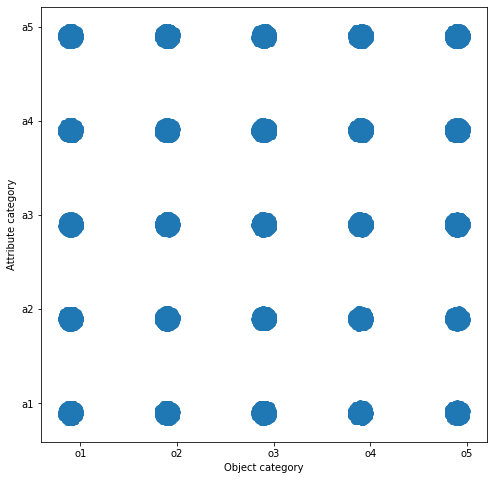

In [17]:
plt.figure(figsize=(8, 8), facecolor=(1, 1, 1))

plt.xlabel("Object category")
plt.ylabel("Attribute category")
plt.xticks([1,2,3,4,5],["o1", "o2", "o3", "o4", "o5"])
plt.yticks([1,2,3,4,5],["a1", "a2", "a3", "a4", "a5"])
plt.scatter(points[:, 0], points[:, 1])
plt.savefig("2DPoints.png")